## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 3 : Explore the inferential statistics on the dataset.

## imports

In [2]:
import pandas
import numpy
import statistics
import scipy.stats
import matplotlib.pyplot as pyplot
import warnings
import random
from scipy import stats
from scipy.stats import anderson
import statsmodels.stats.diagnostic

## Configurations

initializing matplotlib configurations

In [3]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (8, 5)

hiding warnings

In [4]:
warnings.filterwarnings('ignore')

Function Initialiaztions

In [5]:
def normalDistributionGraphGenarator(data:numpy.array,*ExtraArguments)->None:
    """Normalization graph plotter function

    Args:
        data (numpy.array): Any Array or DataFrame Column
    """
    pyplot.figure('Normal Distribution Graph')
    data=numpy.sort(data)
    pyplot.plot(data, scipy.stats.norm.pdf(data, numpy.mean(data),numpy.std(data)))
    for data in ExtraArguments:
        data=numpy.sort(data)
        pyplot.plot(data, scipy.stats.norm.pdf(data, numpy.mean(data),numpy.std(data)))
    pyplot.xlabel('values')
    pyplot.ylabel("Normalized Values")

In [6]:
def HypothesisComparerUsingPValue(probability_value:float,Level_of_Significance=0.05)-> bool:
    """NULL Hypothesis comparer based on probability_values

    Args:
        probability_value (float): probability value for falling in population
        Level_of_Significance (float, optional): Minimum Probability of occurrence of in range, Defaults to 0.05.

    Returns:
        bool: return True if NULL hypothesis is accepted
    """
    if probability_value>=Level_of_Significance:
        print("NULL Hypothesis is Accepted")
        return True
    else:
        print("NULL hypothesis is Rejected")
        return False

In [7]:
def checkHypothesis(stats_value:float,
                    probability_value:float,
                    accept_statement="samples have nearly identical average (expected) values",
                    reject_statement="samples do not have identical means ")->bool:

    """Hypothesis result printer based on stats_value and probability_value
    """
    print("Statistic Value: ",abs(stats_value),"\nProbability-Value: ",probability_value)
    if HypothesisComparerUsingPValue(probability_value,Level_of_Significance)==True:
        print(accept_statement)
        return True
    else:
        print(reject_statement)
        return False

In [159]:
def applyHypothesisTesting(
    ttest_variable1=[],
    ttest_variable2=[],
    anova_data=tuple([]),
    normality_test_data=pandas.DataFrame(),
    population_mean=None
    )->None:
    """Function to apply Hypothesis Testing on the data 
    with the help of scipy.stats and statsmodels.stats.diagnostic
    
    Args:
        ttest_variable1 (list): first variable for ttest
        ttest_variable2 (list, optional): second  variable for ttest. Defaults to [],
        anova_data (tuple of arrays, optional): Data to be tested by ANOVA. Defaults to tuple([]).
        normality_test_data (pandas.DataFrame(), optional): Data to be tested for normality. Defaults to pandas.DataFrame().
        population_mean (float, optional): mean of population. Defaults to None.
    """
    print("Applying Hypothesis Testing🚀🚀🚀")
    print("Default Level of Significance =",Level_of_Significance)
    print("NULL Hypothesis (Ho): Samples have same means")
    print("Alternate Hypothesis (H1): Samples do not have same means")
    print("By Default using 2-tailed Test")
    if len(ttest_variable1)>0:
        print("\nT-Test Testing")
        if len(ttest_variable2)==0 and population_mean!=None:
            print("TTest Using Population Mean")
            stats_value,p_value=scipy.stats.ttest_1samp(ttest_variable1,popmean=population_mean)
            checkHypothesis(stats_value,
                            p_value,
                            "Values of the column is around "+str(population_mean),
                            "Values of column is not around "+str(population_mean)
                           )
        elif len(ttest_variable2)>1 :
            print("TTest Using Two Variable")
            stats_value,p_value=scipy.stats.ttest_ind(
                ttest_variable1,
                ttest_variable2)
            checkHypothesis(stats_value,p_value)
        else:
            print("Please Provide second ttest variable or population mean")
    if len(anova_data)>1:
        print("\nANOVA Testing")
        stats_value,p_value=scipy.stats.f_oneway(*anova_data)
        checkHypothesis(stats_value,p_value)
    if len(anova_data)==1:
        print("For ANOVA test least 2 columns are required")
        
    normality_test_data=pandas.DataFrame(normality_test_data)
    if len(normality_test_data)>1:
        print("\nTesting Normal Distribution Criteria")
        print("NULL Hypothesis (Ho): Data is normally Distributed")
        print("Alternate Hypothesis (H1): Data is not Normally Distributed")
    for column in normality_test_data.columns:
        print("\nNormality Test on ",column,"Column")
        print(" T-Shapiro-Wilk Testing")
        stats_value,p_value=scipy.stats.shapiro(normality_test_data[column])
        checkHypothesis(stats_value,p_value,
                accept_statement="data is a normal distributed.",
                reject_statement="data is not normal distributed."
                       )
        print("\n D’Agostino normaltest Testing")
        stats_value,p_value=stats.normaltest(normality_test_data[column])
        checkHypothesis(stats_value,p_value,
                accept_statement="data is a normal distributed.",
                reject_statement="data is not normal distributed."
                       )
        print("\n Anderson-Darling Testing")
        stats_value,p_value,significance_level=anderson(normality_test_data[column])
        checkHypothesis(stats_value,p_value[2],
                accept_statement="data is a normal distributed.",
                reject_statement="data is not normal distributed."
                       )
        print("\n Lilliefors’ Testing")
        stats_value,p_value=statsmodels.stats.diagnostic.lilliefors(normality_test_data[column])
        checkHypothesis(stats_value,p_value,
                accept_statement="data is a normal distributed.",
                reject_statement="data is not normal distributed."
                       )

reading dataset

In [8]:
ANOVA_Data=pandas.read_excel("../Data/Reference_Data/ANOVA_TAJ.xlsx")
TTEST_Data=pandas.read_excel("../Data/Reference_Data/ttest_Pre Post Score.xlsx")

In [9]:
Data=pandas.read_csv("../Data/Raw_Data/24_01_2023_WorldWide.csv")

Defining the level of significance 

means this is permissible range where distribution data should be occurred

it is simply a minimum probability value in which the data should be accepted
- Level_of_Significance = 5%

In [10]:
Level_of_Significance=0.05

random data generation

In [11]:
Random_Variable_Array=numpy.random.normal(0.0,100,size=200)

reading collectd dataset

In [118]:
Data=pandas.read_csv("../Data/Raw_Data/14_02_2023_WorldWide.csv")

In [119]:
Selected_Columns=['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths','population']

In [120]:
Data=Data[Selected_Columns]

In [121]:
Data=Data.sort_values(by="total_cases",ascending=False).reset_index(drop=True)

In [122]:
Data=Data.dropna()

## Data Exploration

printing ANOVA Table

In [12]:
ANOVA_Data

,Honey Chicken,Pepper Chicken,Spicy Chicken,Tandoori Chicken
0,7,6,8,6
1,8,7,6,5
2,8,7,6,7
3,9,7,7,6
4,8,5,7,7
5,8,8,8,6
6,8,6,6,5


Normalization graph for all columns of ANOVA Data

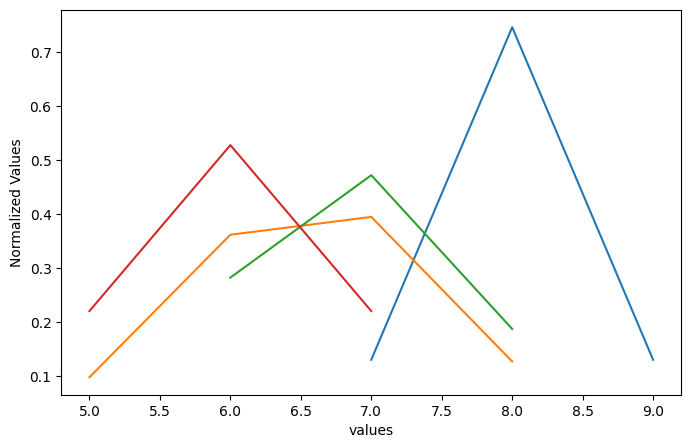

In [13]:
normalDistributionGraphGenarator(ANOVA_Data['Honey Chicken'],ANOVA_Data['Pepper Chicken'],ANOVA_Data['Spicy Chicken'],ANOVA_Data['Tandoori Chicken'])

printing TTEST Data Table

In [14]:
TTEST_Data

,Pre_Score,Post_Score
0,18,22
1,21,25
2,16,17
3,22,24
4,19,16
5,24,29
6,17,20
7,21,23
8,23,19
9,18,20


Normalization graph for all columns of TTEST Data

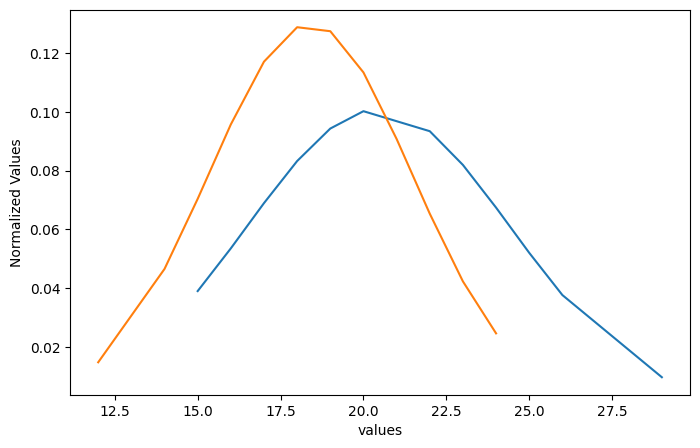

In [15]:
normalDistributionGraphGenarator(TTEST_Data['Post_Score'],TTEST_Data['Pre_Score'])

In [16]:
Random_Variable_Array

array([ 1.59897472e+02, -5.61337192e+01, -7.13380853e+00,  1.58827898e+01,
       -4.28221398e+01,  4.00362327e+01, -1.75183488e+02,  1.85822050e+02,
        6.76946478e+01, -1.74377078e+02,  4.76571644e+01,  5.87537207e+01,
        1.08073974e+02,  4.54423027e+01, -1.39677190e+02,  3.73553682e+01,
       -7.98436560e+01,  6.89487466e+01, -3.22433666e+01, -1.10585469e+02,
        6.63267019e+01,  1.07450973e+02,  1.81742498e+02, -3.91648278e+01,
        1.04722720e+02, -7.67907870e+01, -2.53394901e+01,  1.78103359e+01,
        2.22449864e+01,  5.10890471e+01, -3.40380816e+01, -6.63009369e+01,
        6.10829557e+00,  1.05388875e+01, -8.55992486e+01,  5.64186346e+01,
        1.41572114e+02, -4.99216091e+01, -1.12167563e+02, -1.64122521e+01,
       -8.51919488e+01, -9.16134965e+01, -8.38943099e+01, -2.18470483e+02,
        1.18854333e+02, -1.24502800e+02, -9.69377909e+00,  2.26008658e+01,
        1.12779671e+01,  6.34978784e+00,  9.48104848e+01, -5.56441631e+01,
       -9.32238768e+01,  

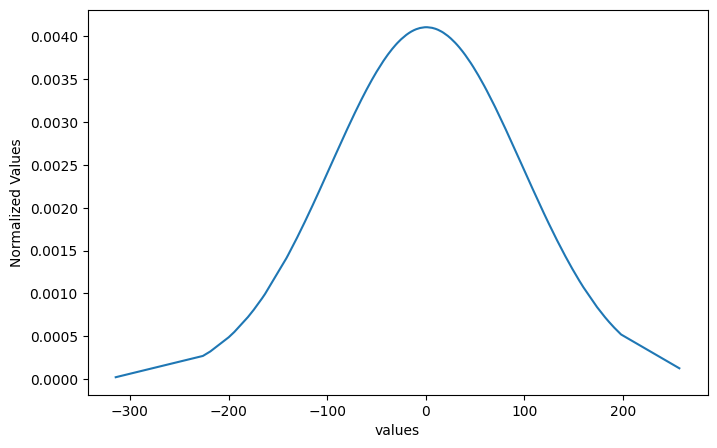

In [17]:
normalDistributionGraphGenarator(Random_Variable_Array)

In [123]:
Data

,iso_code,continent,location,last_updated_date,total_cases,new_cases,total_deaths,new_deaths,population
7,USA,North America,United States,2023-02-12,102849008.0,2469.0,1114377.0,6.0,3.382899e+08
10,IND,Asia,India,2023-02-12,44685425.0,206.0,530753.0,3.0,1.417173e+09
11,FRA,Europe,France,2023-02-12,39599210.0,3366.0,164606.0,20.0,6.781300e+07
12,DEU,Europe,Germany,2023-02-13,37907312.0,13420.0,166763.0,103.0,8.336984e+07
13,BRA,South America,Brazil,2023-02-12,36932830.0,2491.0,697674.0,12.0,2.153135e+08
...,...,...,...,...,...,...,...,...,...
221,MAC,Asia,Macao,2023-02-12,3507.0,0.0,121.0,0.0,6.951800e+05
222,SPM,North America,Saint Pierre and Miquelon,2023-02-12,3452.0,0.0,2.0,0.0,5.885000e+03
223,WLF,Oceania,Wallis and Futuna,2023-02-12,3427.0,0.0,7.0,0.0,1.159600e+04
227,MSR,North America,Montserrat,2023-02-12,1403.0,0.0,8.0,0.0,4.413000e+03


In [127]:
Data.describe()

,total_cases,new_cases,total_deaths,new_deaths,population
count,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02
mean,3.143877e+06,954.443925,3.202823e+04,10.962617,3.721731e+07
std,9.762229e+06,3439.434649,1.070663e+05,45.372206,1.426430e+08
min,1.000000e+00,0.000000,1.000000e+00,0.000000,4.413000e+03
25%,3.314375e+04,0.000000,2.840000e+02,0.000000,8.515890e+05
50%,2.689360e+05,0.000000,2.800000e+03,0.000000,6.797150e+06
75%,1.491994e+06,221.000000,1.706250e+04,0.000000,2.620034e+07
max,1.028490e+08,30901.000000,1.114377e+06,355.000000,1.425887e+09


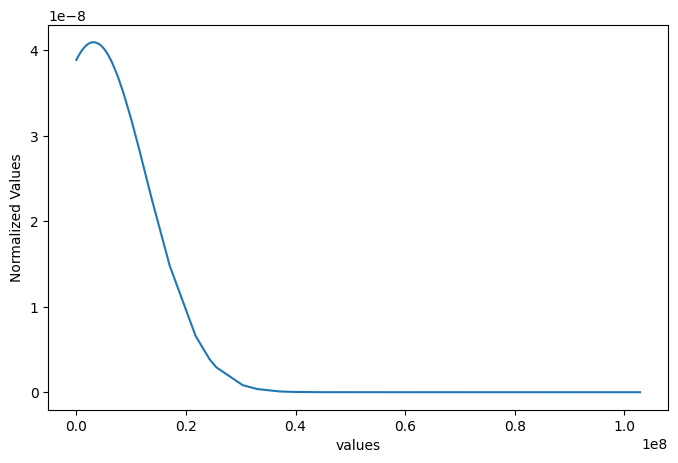

In [129]:
normalDistributionGraphGenarator(Data['total_cases'])

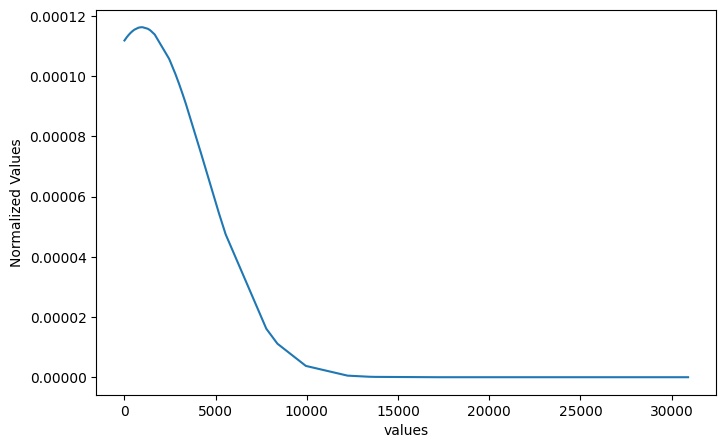

In [130]:
normalDistributionGraphGenarator(Data['new_cases'])

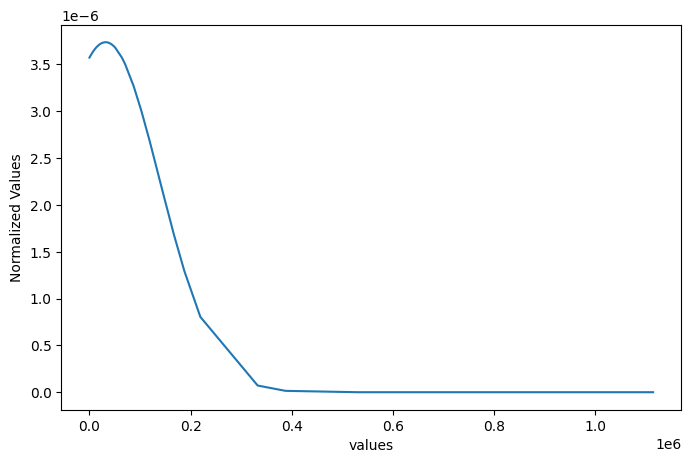

In [131]:
normalDistributionGraphGenarator(Data['total_deaths'])

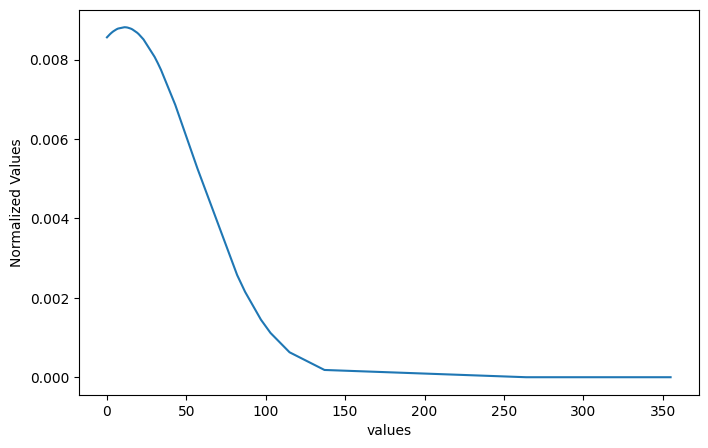

In [132]:
normalDistributionGraphGenarator(Data['new_deaths'])

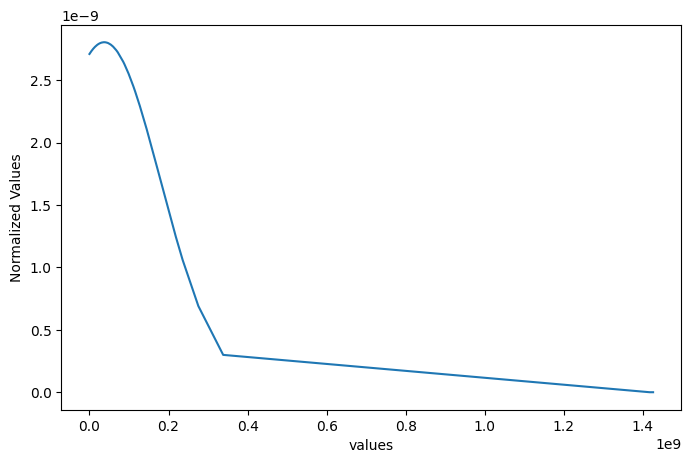

In [133]:
normalDistributionGraphGenarator(Data['population'])

# Hypothesis Testing
Default Testing is based on Two-side values (Two-tailed-test)

## t-test

In [19]:
TTEST_Data.describe()

,Pre_Score,Post_Score
count,20.000000,20.000000
mean,18.400000,20.450000
std,3.152276,4.058454
min,12.000000,15.000000
25%,16.000000,17.750000
50%,18.000000,19.500000
75%,21.000000,24.000000
max,24.000000,29.000000


### one sample test

##### for column Pre_Score 

NULL Hypothesis (Ho): The values of column Pre_Score is around 20

hence let for Ho population_mean=20

In [20]:
population_mean=20

In [21]:
stats_value,p_value=scipy.stats.ttest_1samp(TTEST_Data['Pre_Score'],popmean=population_mean)
checkHypothesis(stats_value,p_value,"Values of the column is around "+str(population_mean),"Values of column is not around "+str(population_mean))

Statistic Value:  2.2699212261400974 
Probability-Value:  0.03504258228701023
NULL hypothesis is Rejected
Values of column is not around 20


False

###### Explaination for above case

- given population_mean is **20**
- if we see actual mean of column Pre_Score is **18.4**
- Now defined level of significance is **0.05 (5%)**
- hence by level of significance, given column should have 95% of total mean of population mean
- calculated probability value is :  **0.03504** (p_value) 
- this is cumulative probability of all elements of the data
- here p_value is **less** than TTEST_Level_of_Significance
- hence the probability of coccurence of the data in given population is less than defined permissible value 
- hence are assumption of that values are around is 20 is gone wrong
- hence NULL Hypothesis is Rejected

##### for column Post_Score 

NULL Hypothesis (Ho): The values of column Post_Score is around 20

hence let for Ho population_mean=20

In [22]:
population_mean=20

In [23]:
stats_value,p_value=scipy.stats.ttest_1samp(TTEST_Data['Post_Score'],popmean=population_mean)
checkHypothesis(stats_value,p_value,"Values of the column is around "+str(population_mean),"Values of column is not around "+str(population_mean))

Statistic Value:  0.49586885793428465 
Probability-Value:  0.6256740287436588
NULL Hypothesis is Accepted
Values of the column is around 20


True

###### Explaination for above case

- given population_mean is **20**
- if we see actual mean of column Pre_Score is **20.45**
- Now defined level of significance is 0.05 (5%)
- hence by level of significance, given column should have 95% of total mean of population mean
- calculated probability value is :  **0.6256 (p_value)**
- this is cumulative probability of all elements of the data
- here p_value is **Greater** than TTEST_Level_of_Significance
- hence the probability of coccurence of the data in given population is greater than defined permissible value 
- hence are assumption of that values are around is 20 is right
- hence NULL Hypothesis is Accepted

### Two sample Test

NULL Hypothesis (Ho): The values of column Post_Score and values of column Pre_Score is same

hence let Ho: means for both columns is same x1_mean=x2_mean

In [42]:
stats_value,p_value=scipy.stats.ttest_ind(TTEST_Data['Pre_Score'],TTEST_Data['Post_Score'])
checkHypothesis(stats_value,p_value)

Statistic Value:  1.7840292427015179 
Probability-Value:  0.0824061077656375
NULL Hypothesis is Accepted
samples have nearly identical average (expected) values


True

###### Explaination for above case
- Now defined level of significance is 0.05 (5%)
- hence by level of significance, given column should have 95% of total mean of population mean
- calculated probability value is :  **0.04120(p_value)**
- this is cumulative probability of all elements of the data for both columns to each other
- here p_value is **less** than TTEST_Level_of_Significance
- hence the probability of is less than defined permissible value 
- hence are assumption of that values are from same population is gone wrong
- hence NULL Hypothesis is Rejected

Extra:
here means of both column are get calculated and mean of one column is tested to elements of other column and vice-versa, and final probability get calculated

## ANOVA test

In [25]:
ANOVA_Data.describe()

,Honey Chicken,Pepper Chicken,Spicy Chicken,Tandoori Chicken
count,7.00000,7.000000,7.000000,7.000000
mean,8.00000,6.571429,6.857143,6.000000
std,0.57735,0.975900,0.899735,0.816497
min,7.00000,5.000000,6.000000,5.000000
25%,8.00000,6.000000,6.000000,5.500000
50%,8.00000,7.000000,7.000000,6.000000
75%,8.00000,7.000000,7.500000,6.500000
max,9.00000,8.000000,8.000000,7.000000


#### ANOVA test for all column

In [53]:
stats_value,p_value=scipy.stats.f_oneway(ANOVA_Data['Honey Chicken'],ANOVA_Data['Pepper Chicken'],ANOVA_Data['Spicy Chicken'],ANOVA_Data['Tandoori Chicken'])
checkHypothesis(stats_value,p_value)

Statistic Value:  7.172413793103451 
Probability-Value:  0.0013322300743224683
NULL hypothesis is Rejected
samples do not have identical means 


False

#### ANOVA test for last three columns

In [58]:
stats_value,p_value=scipy.stats.f_oneway(ANOVA_Data['Pepper Chicken'],ANOVA_Data['Spicy Chicken'],ANOVA_Data['Tandoori Chicken'])
checkHypothesis(stats_value,p_value)

Statistic Value:  1.647058823529412 
Probability-Value:  0.22035134388208824
NULL Hypothesis is Accepted
samples have nearly identical average (expected) values


True

## Shapiro-Wilk test

In [28]:
stats_value,p_value=scipy.stats.shapiro(Random_Variable_Array)
checkHypothesis(stats_value,p_value)

Statistic Value:  0.9953514337539673 
Probability-Value:  0.8001432418823242
NULL Hypothesis is Accepted
samples have nearly identical average (expected) values


True

## D’Agostino normaltest test

In [29]:
stats_value,p_value=stats.normaltest(Random_Variable_Array)
checkHypothesis(stats_value,p_value)

Statistic Value:  0.47225095553515317 
Probability-Value:  0.7896815802341206
NULL Hypothesis is Accepted
samples have nearly identical average (expected) values


True

## Anderson-Darling test 

Critical values provided are for the following significance levels:

normal/exponential
15%, 10%, 5%, 2.5%, 1%

In [95]:
stats_value,p_value,significance_level=anderson(Random_Variable_Array)
checkHypothesis(stats_value,p_value[2],
                accept_statement="data is a normal distributed.",
                reject_statement="data is not normal distributed."
)

Statistic Value:  0.23976648358706143 
Probability-Value:  0.772
NULL Hypothesis is Accepted
data is a normal distributed.


True

## Lilliefors’ test

In [97]:
stats_value,p_value=statsmodels.stats.diagnostic.lilliefors(Random_Variable_Array)
checkHypothesis(stats_value,p_value,
                accept_statement="data is a normal distributed.",
                reject_statement="data is not normal distributed."
)

Statistic Value:  0.04571261448074082 
Probability-Value:  0.40510006260774717
NULL Hypothesis is Accepted
data is a normal distributed.


True

# Hypothesis Testing on Collected Data

In [160]:
applyHypothesisTesting(
    ttest_variable1=Data['new_cases'],
    ttest_variable2=Data['new_deaths'],
    anova_data=[Data['total_cases'],Data['new_cases'],Data['total_deaths']],
    normality_test_data=Data[Data.describe().columns]
)

Applying Hypothesis Testing🚀🚀🚀
Default Level of Significance = 0.05
NULL Hypothesis (Ho): Samples have same means
Alternate Hypothesis (H1): Samples do not have same means
By Default using 2-tailed Test

T-Test Testing
TTest Using Two Variable
Statistic Value:  4.012502721465028 
Probability-Value:  7.096630812760839e-05
NULL hypothesis is Rejected
samples do not have identical means 

ANOVA Testing
Statistic Value:  21.96133234703622 
Probability-Value:  5.967900181776383e-10
NULL hypothesis is Rejected
samples do not have identical means 

Testing Normal Distribution Criteria
NULL Hypothesis (Ho): Data is normally Distributed
Alternate Hypothesis (H1): Data is not Normally Distributed

Normality Test on  total_cases Column
 T-Shapiro-Wilk Testing
Statistic Value:  0.33623605966567993 
Probability-Value:  3.109437969337497e-27
NULL hypothesis is Rejected
data is not normal distributed.

 D’Agostino normaltest Testing
Statistic Value:  303.4492604338371 
Probability-Value:  1.278881567